In [15]:
#Loading the Reuters dataset
#The data is stored as an array of lists of integers
#Every list is an example of a newswire, encoded in integers, i.e. a map integers to words
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [16]:
#Decoding newswire back into text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decoded(x): #function for translating the newswires back into text
    print(' '.join([reverse_word_index.get(i-3, '?') for i in train_data[x]]))

In [20]:
#Vectorize the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [43]:
#vectorize the labels
#there are two possibilities
#we use one-hot encoding, i.e. we embed each label as an all-zero vector with 1 in the place of the label index
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

#we could do this also with a built-in way from Keras:
#from keras.utils.np_utils import to_categorical

#one_hot_train_labels1 = to_categorical(train_labels)
#one_hot_test_labels2 = to_categorical(test_labels)

In [45]:
#Defining the model
#We use 64 hidden layers, since 16 could be to limited to learn to seperate 46 different classes
#i.e. information could get lost
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
#we end the network with a Dense layer of size 46, i.e. for each input sample we get a 46dim vector
#each dimension will encode a different output class
#softmax activation will lead to a output of a probability distribution
#each dimension i of the output vector gives us the probability that the sample belongs to class i

In [46]:
#compiling the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [47]:
#setting a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [48]:
#training the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 204us/sample - loss: 2.5944 - acc: 0.5056 - val_loss: 1.7277 - val_acc: 0.6340
Epoch 2/20
7982/7982 [==============================] - 1s 160us/sample - loss: 1.4296 - acc: 0.6973 - val_loss: 1.3081 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 147us/sample - loss: 1.0562 - acc: 0.7687 - val_loss: 1.1164 - val_acc: 0.7620
Epoch 4/20
7982/7982 [==============================] - 1s 148us/sample - loss: 0.8204 - acc: 0.8212 - val_loss: 1.0259 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 141us/sample - loss: 0.6509 - acc: 0.8626 - val_loss: 0.9469 - val_acc: 0.7980
Epoch 6/20
7982/7982 [==============================] - 1s 163us/sample - loss: 0.5193 - acc: 0.8916 - val_loss: 0.9016 - val_acc: 0.8110
Epoch 7/20
7982/7982 [==============================] - 1s 150us/sample - loss: 0.4200 - acc: 0.9134 - val_loss: 0.8870 - va

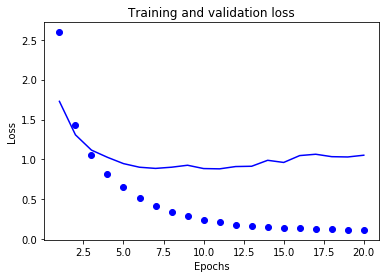

In [50]:
#plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()